In [1]:
import numpy as np
import tensorflow as tf
from lime import lime_image
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_ubyte

2024-04-01 11:13:43.169451: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
vgg = tf.keras.models.load_model('/Users/garvsawhney/Desktop/NEWMODEL/vgg19model.keras')

In [3]:
explainer = lime_image.LimeImageExplainer()

In [4]:
img_path = '/Users/garvsawhney/Downloads/PlantVillage(split)/val/Potato___Early_blight/ecf9d01d-b97f-4cf8-99e5-7036bd91b5d1___RS_Early.B 8650.JPG'
img = image.load_img(img_path, target_size=(128, 128))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [5]:
explanation = explainer.explain_instance(x[0], vgg.predict, top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


In [6]:
heatmap = explanation.image.astype('uint8')

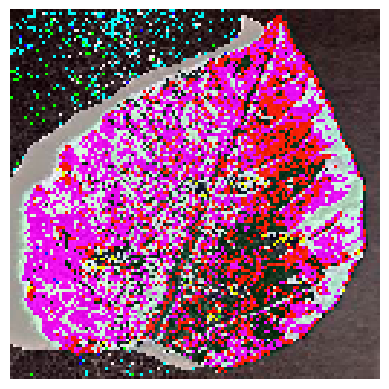

In [7]:
plt.imshow(heatmap, cmap='hot', interpolation='nearest')
plt.axis('off')
plt.show()

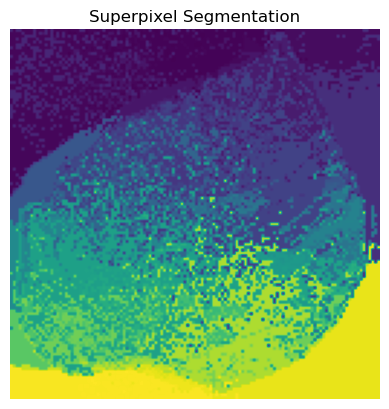

In [8]:
plt.imshow(explanation.segments)
plt.title('Superpixel Segmentation')
plt.axis('off')
plt.show()

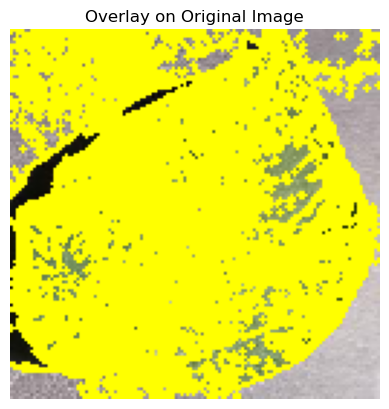

In [9]:
overlay = mark_boundaries(img_as_ubyte(img), explanation.segments)
plt.imshow(overlay)
plt.title('Overlay on Original Image')
plt.axis('off')
plt.show()

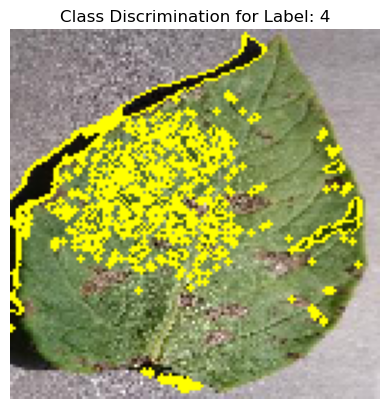

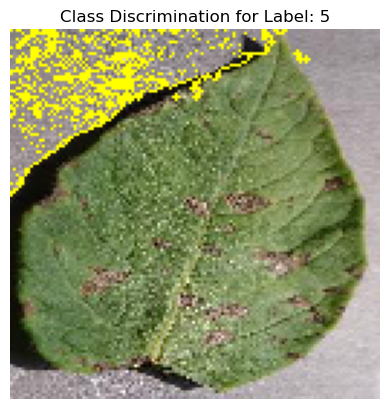

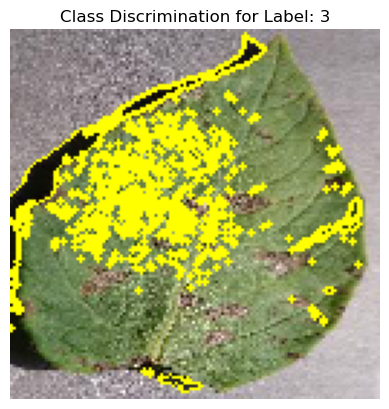

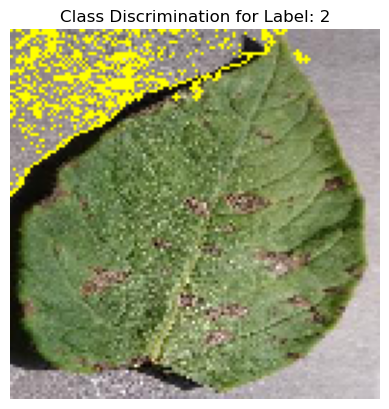

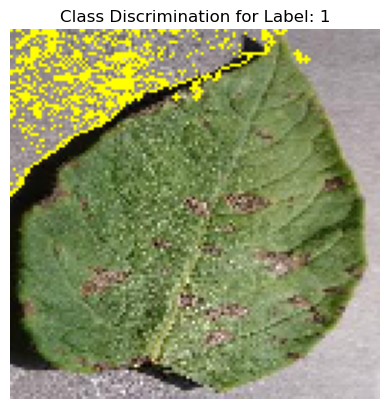

In [10]:
for i in range(len(explanation.top_labels)):
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[i], positive_only=False, num_features=10, hide_rest=False)
    plt.imshow(mark_boundaries(img_as_ubyte(img), mask))
    plt.title('Class Discrimination for Label: {}'.format(explanation.top_labels[i]))
    plt.axis('off')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


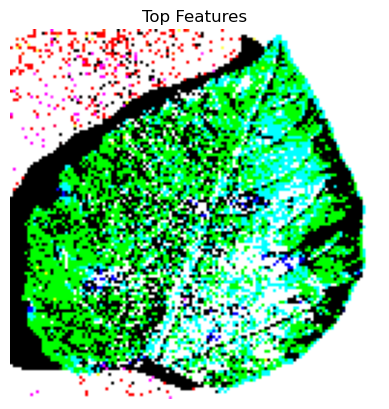

In [11]:
plt.imshow(explanation.image)
plt.title('Top Features')
plt.axis('off')
plt.show()